# Diabetes Detection


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The provided dataset is used for diabetes prediction. It contains various features such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age. The objective is to build a predictive model that can determine the likelihood of an individual having diabetes based on these input features.

In [2]:
data=pd.read_csv("diabetes.csv")
X = data[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']
X = X.values
y = y.values
print("Input features: ", X)
print("Target Features: ",y)

Input features:  [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Target Features:  [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 

In [3]:
print ('The shape of input is:', X.shape)
print ('The shape of target variable is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of input is: (768, 8)
The shape of target variable is:  (768,)
Number of training examples (m): 768


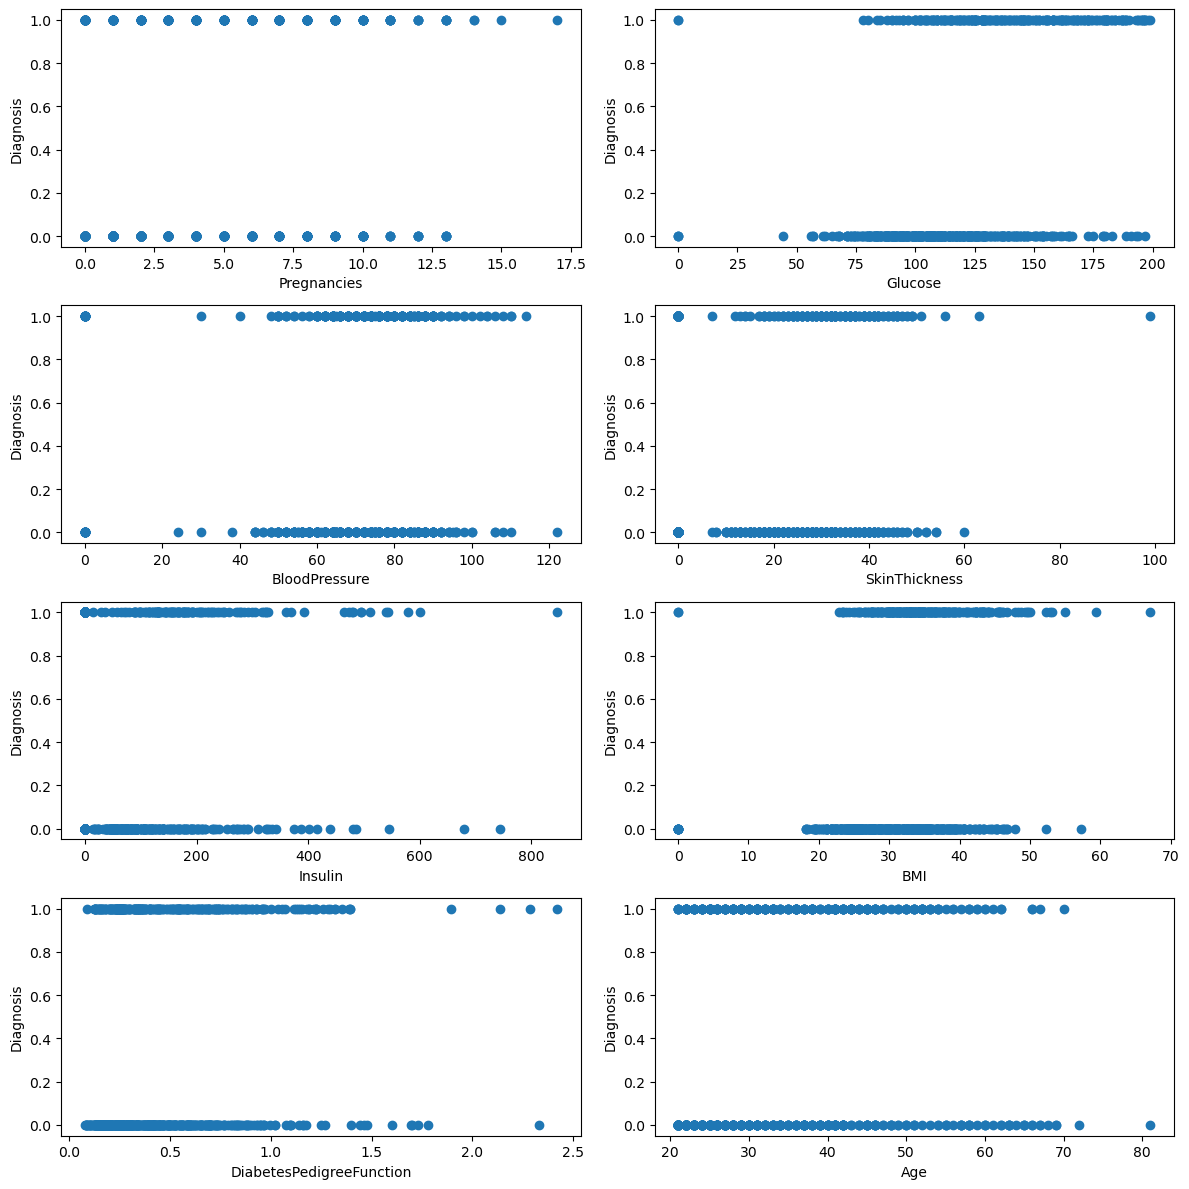

In [4]:

# Create a figure with 2 subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
# Plot each input feature against the target variable (Diagnosis)
axs[0][0].scatter(X[:, 0], y)  
axs[0][0].set_xlabel('Pregnancies')
axs[0][0].set_ylabel('Diagnosis')

axs[0][1].scatter(X[:, 1], y) 
axs[0][1].set_xlabel('Glucose')
axs[0][1].set_ylabel('Diagnosis')

axs[1][0].scatter(X[:, 2], y) 
axs[1][0].set_xlabel('BloodPressure')
axs[1][0].set_ylabel('Diagnosis')

axs[1][1].scatter(X[:, 3], y) 
axs[1][1].set_xlabel('SkinThickness')
axs[1][1].set_ylabel('Diagnosis')

axs[2][0].scatter(X[:, 4], y) 
axs[2][0].set_xlabel('Insulin')
axs[2][0].set_ylabel('Diagnosis')

axs[2][1].scatter(X[:, 5], y)
axs[2][1].set_xlabel('BMI')
axs[2][1].set_ylabel('Diagnosis')

axs[3][0].scatter(X[:, 6], y)
axs[3][0].set_xlabel('DiabetesPedigreeFunction')
axs[3][0].set_ylabel('Diagnosis')

axs[3][1].scatter(X[:, 7], y)
axs[3][1].set_xlabel('Age')
axs[3][1].set_ylabel('Diagnosis')


# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
def sigmoid(z):
          
    g = 1/(1+np.exp(-z))
    
    return g

In [6]:
def compute_cost(X, y, w, b):

    m, n = X.shape
    epsilon = 1e-8 
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb+epsilon) - (1-y[i])*np.log(1-f_wb+epsilon)
    total_cost = cost/m

    return total_cost

In [7]:
def compute_gradient(X, y, w, b, lambda_=None): 
    
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   

    return dj_db, dj_dw

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(X)

    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db   
        print(f"cost function after {i} iteration is {compute_cost(X,y,w_in,b_in)} ")
        
    return w_in, b_in

In [9]:
intial_w =np.random.randn(8)
initial_b = 0

iterations = 10000
alpha = 0.00001

w,b= gradient_descent(X ,y, intial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)

cost function after 0 iteration is 8.319177989213582 
cost function after 1 iteration is 8.30840696111641 
cost function after 2 iteration is 8.29765665331859 
cost function after 3 iteration is 8.28692557523609 
cost function after 4 iteration is 8.276211891672501 
cost function after 5 iteration is 8.265513420269597 
cost function after 6 iteration is 8.254827630601108 
cost function after 7 iteration is 8.2441516447987 
cost function after 8 iteration is 8.233482240753224 
cost function after 9 iteration is 8.222815855757153 
cost function after 10 iteration is 8.212148593863178 
cost function after 11 iteration is 8.201476241528596 
cost function after 12 iteration is 8.190794285767991 
cost function after 13 iteration is 8.180097948560881 
cost function after 14 iteration is 8.169382232588317 
cost function after 15 iteration is 8.158641985291075 
cost function after 16 iteration is 8.147871981251864 
cost function after 17 iteration is 8.137067023408651 
cost function after 18 it

cost function after 156 iteration is 6.690509134747484 
cost function after 157 iteration is 6.6830345968916065 
cost function after 158 iteration is 6.675586628602957 
cost function after 159 iteration is 6.668163245647347 
cost function after 160 iteration is 6.660762951230928 
cost function after 161 iteration is 6.653384719272758 
cost function after 162 iteration is 6.646027957310641 
cost function after 163 iteration is 6.638692454060532 
cost function after 164 iteration is 6.6313783207656956 
cost function after 165 iteration is 6.624085934063607 
cost function after 166 iteration is 6.616815880310457 
cost function after 167 iteration is 6.609568903273449 
cost function after 168 iteration is 6.602345851765102 
cost function after 169 iteration is 6.5951476288443445 
cost function after 170 iteration is 6.587975140648312 
cost function after 171 iteration is 6.580829250431649 
cost function after 172 iteration is 6.573710736599305 
cost function after 173 iteration is 6.566620

cost function after 304 iteration is 5.793646141013446 
cost function after 305 iteration is 5.78874726946404 
cost function after 306 iteration is 5.783873085843052 
cost function after 307 iteration is 5.7790243109883646 
cost function after 308 iteration is 5.77420170670555 
cost function after 309 iteration is 5.769406067839506 
cost function after 310 iteration is 5.7646382105348755 
cost function after 311 iteration is 5.759898954770027 
cost function after 312 iteration is 5.755189100671249 
cost function after 313 iteration is 5.750509402877245 
cost function after 314 iteration is 5.745860540652142 
cost function after 315 iteration is 5.741243089693999 
cost function after 316 iteration is 5.736657497156828 
cost function after 317 iteration is 5.7321040631064015 
cost function after 318 iteration is 5.727582928912105 
cost function after 319 iteration is 5.723094077837261 
cost function after 320 iteration is 5.718637342948939 
cost function after 321 iteration is 5.71421242

cost function after 455 iteration is 5.273873766078451 
cost function after 456 iteration is 5.271509204800945 
cost function after 457 iteration is 5.269155722734832 
cost function after 458 iteration is 5.26681314124721 
cost function after 459 iteration is 5.264481287598458 
cost function after 460 iteration is 5.262159994991641 
cost function after 461 iteration is 5.259849102932631 
cost function after 462 iteration is 5.2575484578309775 
cost function after 463 iteration is 5.255257913359925 
cost function after 464 iteration is 5.252977330858678 
cost function after 465 iteration is 5.250706579793449 
cost function after 466 iteration is 5.248445537509697 
cost function after 467 iteration is 5.246194090749832 
cost function after 468 iteration is 5.243952135387668 
cost function after 469 iteration is 5.241719576404108 
cost function after 470 iteration is 5.239496328536981 
cost function after 471 iteration is 5.237282316379607 
cost function after 472 iteration is 5.235077474

cost function after 605 iteration is 5.0259827036812625 
cost function after 606 iteration is 5.024954335900084 
cost function after 607 iteration is 5.023931903585017 
cost function after 608 iteration is 5.02291536654801 
cost function after 609 iteration is 5.021904685013426 
cost function after 610 iteration is 5.020899819479985 
cost function after 611 iteration is 5.019900730899759 
cost function after 612 iteration is 5.018907380520468 
cost function after 613 iteration is 5.017919729778806 
cost function after 614 iteration is 5.016937740472984 
cost function after 615 iteration is 5.0159613747177625 
cost function after 616 iteration is 5.0149905949521285 
cost function after 617 iteration is 5.0140253637111245 
cost function after 618 iteration is 5.0130656441403545 
cost function after 619 iteration is 5.0121113993662485 
cost function after 620 iteration is 5.0111625929213695 
cost function after 621 iteration is 5.010219188603239 
cost function after 622 iteration is 5.009

cost function after 755 iteration is 4.920569669397143 
cost function after 756 iteration is 4.920102317219775 
cost function after 757 iteration is 4.919637106789 
cost function after 758 iteration is 4.919174023967981 
cost function after 759 iteration is 4.918713054626296 
cost function after 760 iteration is 4.918254184855853 
cost function after 761 iteration is 4.917797400883644 
cost function after 762 iteration is 4.917342689151993 
cost function after 763 iteration is 4.9168900358331085 
cost function after 764 iteration is 4.916439427361616 
cost function after 765 iteration is 4.9159908504747865 
cost function after 766 iteration is 4.915544291936184 
cost function after 767 iteration is 4.915099738509611 
cost function after 768 iteration is 4.914657177167832 
cost function after 769 iteration is 4.914216595002881 
cost function after 770 iteration is 4.9137779789770155 
cost function after 771 iteration is 4.913341316505641 
cost function after 772 iteration is 4.912906594

cost function after 906 iteration is 4.868201537948488 
cost function after 907 iteration is 4.867946038804815 
cost function after 908 iteration is 4.867691435168662 
cost function after 909 iteration is 4.867437722732225 
cost function after 910 iteration is 4.8671848967736775 
cost function after 911 iteration is 4.866932953073032 
cost function after 912 iteration is 4.866681887211777 
cost function after 913 iteration is 4.866431694793632 
cost function after 914 iteration is 4.866182371412306 
cost function after 915 iteration is 4.865933912959673 
cost function after 916 iteration is 4.865686315046793 
cost function after 917 iteration is 4.865439573466818 
cost function after 918 iteration is 4.865193683767784 
cost function after 919 iteration is 4.864948642172661 
cost function after 920 iteration is 4.864704444318043 
cost function after 921 iteration is 4.864461085974759 
cost function after 922 iteration is 4.864218562963985 
cost function after 923 iteration is 4.86397687

cost function after 1057 iteration is 4.837724677762258 
cost function after 1058 iteration is 4.8375660085776255 
cost function after 1059 iteration is 4.837407786808913 
cost function after 1060 iteration is 4.837250010493036 
cost function after 1061 iteration is 4.83709267777514 
cost function after 1062 iteration is 4.836935786739502 
cost function after 1063 iteration is 4.83677933572593 
cost function after 1064 iteration is 4.836623322484991 
cost function after 1065 iteration is 4.836467745598518 
cost function after 1066 iteration is 4.836312602931508 
cost function after 1067 iteration is 4.836157892711809 
cost function after 1068 iteration is 4.836003613289727 
cost function after 1069 iteration is 4.835849762646769 
cost function after 1070 iteration is 4.835696339052312 
cost function after 1071 iteration is 4.8355433407381145 
cost function after 1072 iteration is 4.835390765987711 
cost function after 1073 iteration is 4.835238612838739 
cost function after 1074 iterat

cost function after 1203 iteration is 4.818480857457708 
cost function after 1204 iteration is 4.818371452547788 
cost function after 1205 iteration is 4.818262296192898 
cost function after 1206 iteration is 4.818153387757579 
cost function after 1207 iteration is 4.818044725992576 
cost function after 1208 iteration is 4.817936310113043 
cost function after 1209 iteration is 4.817828139029006 
cost function after 1210 iteration is 4.817720211900213 
cost function after 1211 iteration is 4.817612527744164 
cost function after 1212 iteration is 4.8175050856920425 
cost function after 1213 iteration is 4.817397884665389 
cost function after 1214 iteration is 4.817290923971551 
cost function after 1215 iteration is 4.817184202511052 
cost function after 1216 iteration is 4.817077719399482 
cost function after 1217 iteration is 4.816971473749865 
cost function after 1218 iteration is 4.816865464621774 
cost function after 1219 iteration is 4.816759691252061 
cost function after 1220 itera

cost function after 1348 iteration is 4.804799268471022 
cost function after 1349 iteration is 4.804717623203695 
cost function after 1350 iteration is 4.804636121460718 
cost function after 1351 iteration is 4.804554762652372 
cost function after 1352 iteration is 4.804473546090834 
cost function after 1353 iteration is 4.804392471558571 
cost function after 1354 iteration is 4.804311538263394 
cost function after 1355 iteration is 4.804230745623989 
cost function after 1356 iteration is 4.804150093300013 
cost function after 1357 iteration is 4.804069580729608 
cost function after 1358 iteration is 4.803989207284771 
cost function after 1359 iteration is 4.803908972448994 
cost function after 1360 iteration is 4.8038288758231245 
cost function after 1361 iteration is 4.803748916664842 
cost function after 1362 iteration is 4.803669094726414 
cost function after 1363 iteration is 4.80358940931538 
cost function after 1364 iteration is 4.8035098598212445 
cost function after 1365 itera

cost function after 1492 iteration is 4.794283521132013 
cost function after 1493 iteration is 4.7942177244181785 
cost function after 1494 iteration is 4.794152008499915 
cost function after 1495 iteration is 4.794086372807838 
cost function after 1496 iteration is 4.794020817054955 
cost function after 1497 iteration is 4.793955340907732 
cost function after 1498 iteration is 4.793889943997227 
cost function after 1499 iteration is 4.793824625978066 
cost function after 1500 iteration is 4.793759386657711 
cost function after 1501 iteration is 4.793694225196849 
cost function after 1502 iteration is 4.793629141784802 
cost function after 1503 iteration is 4.7935641357863 
cost function after 1504 iteration is 4.793499207019088 
cost function after 1505 iteration is 4.793434354956092 
cost function after 1506 iteration is 4.79336957922797 
cost function after 1507 iteration is 4.793304879656015 
cost function after 1508 iteration is 4.793240255971386 
cost function after 1509 iteratio

cost function after 1637 iteration is 4.785420691721131 
cost function after 1638 iteration is 4.785363230750153 
cost function after 1639 iteration is 4.78530580647311 
cost function after 1640 iteration is 4.7852484183545725 
cost function after 1641 iteration is 4.785191066321844 
cost function after 1642 iteration is 4.785133750068257 
cost function after 1643 iteration is 4.785076469390866 
cost function after 1644 iteration is 4.785019224009725 
cost function after 1645 iteration is 4.784962013679912 
cost function after 1646 iteration is 4.784904838139886 
cost function after 1647 iteration is 4.784847697152952 
cost function after 1648 iteration is 4.784790590572619 
cost function after 1649 iteration is 4.78473351807495 
cost function after 1650 iteration is 4.784676479457835 
cost function after 1651 iteration is 4.7846194744232395 
cost function after 1652 iteration is 4.78456250279875 
cost function after 1653 iteration is 4.784505564450092 
cost function after 1654 iterati

cost function after 1786 iteration is 4.777150750200673 
cost function after 1787 iteration is 4.777096641852363 
cost function after 1788 iteration is 4.777042546712021 
cost function after 1789 iteration is 4.77698846460261 
cost function after 1790 iteration is 4.77693439557459 
cost function after 1791 iteration is 4.77688033953372 
cost function after 1792 iteration is 4.7768262963532235 
cost function after 1793 iteration is 4.776772266161481 
cost function after 1794 iteration is 4.776718248731511 
cost function after 1795 iteration is 4.776664244000417 
cost function after 1796 iteration is 4.776610251975265 
cost function after 1797 iteration is 4.776556272709985 
cost function after 1798 iteration is 4.7765023060057015 
cost function after 1799 iteration is 4.776448351893565 
cost function after 1800 iteration is 4.776394410259232 
cost function after 1801 iteration is 4.776340481167616 
cost function after 1802 iteration is 4.776286564504633 
cost function after 1803 iterati

cost function after 1935 iteration is 4.769220115603516 
cost function after 1936 iteration is 4.769167781004049 
cost function after 1937 iteration is 4.7691154588386135 
cost function after 1938 iteration is 4.769063149335481 
cost function after 1939 iteration is 4.769010852555604 
cost function after 1940 iteration is 4.768958568276592 
cost function after 1941 iteration is 4.768906296792225 
cost function after 1942 iteration is 4.768854037922583 
cost function after 1943 iteration is 4.768801791655554 
cost function after 1944 iteration is 4.768749558145821 
cost function after 1945 iteration is 4.7686973373674855 
cost function after 1946 iteration is 4.768645129322948 
cost function after 1947 iteration is 4.768592934164306 
cost function after 1948 iteration is 4.7685407516617895 
cost function after 1949 iteration is 4.768488581995199 
cost function after 1950 iteration is 4.768436425092516 
cost function after 1951 iteration is 4.768384281227914 
cost function after 1952 ite

cost function after 2081 iteration is 4.7617207434016935 
cost function after 2082 iteration is 4.76167040132755 
cost function after 2083 iteration is 4.76162007348486 
cost function after 2084 iteration is 4.761569760015297 
cost function after 2085 iteration is 4.7615194605810105 
cost function after 2086 iteration is 4.761469175477023 
cost function after 2087 iteration is 4.761418904513298 
cost function after 2088 iteration is 4.761368647748797 
cost function after 2089 iteration is 4.761318405277396 
cost function after 2090 iteration is 4.76126817698985 
cost function after 2091 iteration is 4.761217962867517 
cost function after 2092 iteration is 4.761167762993749 
cost function after 2093 iteration is 4.761117577293825 
cost function after 2094 iteration is 4.7610674056824545 
cost function after 2095 iteration is 4.761017248439935 
cost function after 2096 iteration is 4.760967105346807 
cost function after 2097 iteration is 4.760916976363936 
cost function after 2098 iterat

cost function after 2225 iteration is 4.754615879165758 
cost function after 2226 iteration is 4.754567531626597 
cost function after 2227 iteration is 4.754519197293952 
cost function after 2228 iteration is 4.754470876206301 
cost function after 2229 iteration is 4.75442256825139 
cost function after 2230 iteration is 4.754374273512603 
cost function after 2231 iteration is 4.754325991855695 
cost function after 2232 iteration is 4.754277723419337 
cost function after 2233 iteration is 4.754229468187361 
cost function after 2234 iteration is 4.754181225942574 
cost function after 2235 iteration is 4.754132996838902 
cost function after 2236 iteration is 4.754084780851602 
cost function after 2237 iteration is 4.754036578052104 
cost function after 2238 iteration is 4.753988388363717 
cost function after 2239 iteration is 4.753940211552545 
cost function after 2240 iteration is 4.753892047978844 
cost function after 2241 iteration is 4.753843897406894 
cost function after 2242 iterati

cost function after 2369 iteration is 4.747784012528054 
cost function after 2370 iteration is 4.747737442679688 
cost function after 2371 iteration is 4.747690884271354 
cost function after 2372 iteration is 4.747644337313733 
cost function after 2373 iteration is 4.747597801798807 
cost function after 2374 iteration is 4.747551277691923 
cost function after 2375 iteration is 4.747504765056658 
cost function after 2376 iteration is 4.7474582636929705 
cost function after 2377 iteration is 4.7474117736546 
cost function after 2378 iteration is 4.7473652950588585 
cost function after 2379 iteration is 4.747318827780403 
cost function after 2380 iteration is 4.747272371823578 
cost function after 2381 iteration is 4.747225927183232 
cost function after 2382 iteration is 4.74717949393541 
cost function after 2383 iteration is 4.747133071994834 
cost function after 2384 iteration is 4.747086661214943 
cost function after 2385 iteration is 4.747040261791292 
cost function after 2386 iterati

cost function after 2514 iteration is 4.7411449386773645 
cost function after 2515 iteration is 4.741099905150146 
cost function after 2516 iteration is 4.74105488160979 
cost function after 2517 iteration is 4.741009867769046 
cost function after 2518 iteration is 4.7409648636417385 
cost function after 2519 iteration is 4.740919869303691 
cost function after 2520 iteration is 4.7408748847257804 
cost function after 2521 iteration is 4.740829909893702 
cost function after 2522 iteration is 4.740784944659343 
cost function after 2523 iteration is 4.740739989215593 
cost function after 2524 iteration is 4.740695043354061 
cost function after 2525 iteration is 4.740650107222215 
cost function after 2526 iteration is 4.740605180935224 
cost function after 2527 iteration is 4.740560264045072 
cost function after 2528 iteration is 4.740515356934165 
cost function after 2529 iteration is 4.740470459451856 
cost function after 2530 iteration is 4.740425571652037 
cost function after 2531 iter

cost function after 2661 iteration is 4.734624695794063 
cost function after 2662 iteration is 4.734580992545119 
cost function after 2663 iteration is 4.73453729776866 
cost function after 2664 iteration is 4.734493611312115 
cost function after 2665 iteration is 4.734449933291479 
cost function after 2666 iteration is 4.734406263459966 
cost function after 2667 iteration is 4.734362601993757 
cost function after 2668 iteration is 4.734318948889849 
cost function after 2669 iteration is 4.734275304013182 
cost function after 2670 iteration is 4.734231667453302 
cost function after 2671 iteration is 4.734188039215417 
cost function after 2672 iteration is 4.734144419176624 
cost function after 2673 iteration is 4.734100807479615 
cost function after 2674 iteration is 4.734057203962659 
cost function after 2675 iteration is 4.734013608798669 
cost function after 2676 iteration is 4.7339700218143745 
cost function after 2677 iteration is 4.73392644312747 
cost function after 2678 iterati

cost function after 2805 iteration is 4.728413374058329 
cost function after 2806 iteration is 4.7283707887999284 
cost function after 2807 iteration is 4.728328210735916 
cost function after 2808 iteration is 4.728285639868331 
cost function after 2809 iteration is 4.728243076042348 
cost function after 2810 iteration is 4.728200519450859 
cost function after 2811 iteration is 4.728157970161097 
cost function after 2812 iteration is 4.728115427895453 
cost function after 2813 iteration is 4.728072892834597 
cost function after 2814 iteration is 4.728030364922288 
cost function after 2815 iteration is 4.72798784415162 
cost function after 2816 iteration is 4.72794533039539 
cost function after 2817 iteration is 4.727902823898864 
cost function after 2818 iteration is 4.727860324430373 
cost function after 2819 iteration is 4.727817832177398 
cost function after 2820 iteration is 4.727775346993115 
cost function after 2821 iteration is 4.727732868819758 
cost function after 2822 iterati

cost function after 2951 iteration is 4.722268479801894 
cost function after 2952 iteration is 4.722226870931659 
cost function after 2953 iteration is 4.722185268254836 
cost function after 2954 iteration is 4.722143671675659 
cost function after 2955 iteration is 4.7221020813521 
cost function after 2956 iteration is 4.722060497290164 
cost function after 2957 iteration is 4.722018919307319 
cost function after 2958 iteration is 4.721977347530536 
cost function after 2959 iteration is 4.721935781906047 
cost function after 2960 iteration is 4.721894222404393 
cost function after 2961 iteration is 4.721852669118086 
cost function after 2962 iteration is 4.721811121912978 
cost function after 2963 iteration is 4.721769580954942 
cost function after 2964 iteration is 4.721728046016618 
cost function after 2965 iteration is 4.721686517209824 
cost function after 2966 iteration is 4.7216449945258 
cost function after 2967 iteration is 4.721603477966464 
cost function after 2968 iteration 

cost function after 3101 iteration is 4.716093076233348 
cost function after 3102 iteration is 4.7160523302214195 
cost function after 3103 iteration is 4.716011589455319 
cost function after 3104 iteration is 4.715970854084449 
cost function after 3105 iteration is 4.715930124020485 
cost function after 3106 iteration is 4.715889399222905 
cost function after 3107 iteration is 4.715848679613348 
cost function after 3108 iteration is 4.715807965440407 
cost function after 3109 iteration is 4.71576725657926 
cost function after 3110 iteration is 4.715726552974895 
cost function after 3111 iteration is 4.715685854616262 
cost function after 3112 iteration is 4.715645161501784 
cost function after 3113 iteration is 4.715604473643269 
cost function after 3114 iteration is 4.715563791233259 
cost function after 3115 iteration is 4.715523113886049 
cost function after 3116 iteration is 4.715482441834528 
cost function after 3117 iteration is 4.715441774991797 
cost function after 3118 iterat

cost function after 3248 iteration is 4.71015776416618 
cost function after 3249 iteration is 4.710117744154086 
cost function after 3250 iteration is 4.710077728683354 
cost function after 3251 iteration is 4.710037717768122 
cost function after 3252 iteration is 4.709997711377539 
cost function after 3253 iteration is 4.709957709640933 
cost function after 3254 iteration is 4.709917712412092 
cost function after 3255 iteration is 4.709877719801381 
cost function after 3256 iteration is 4.709837731552617 
cost function after 3257 iteration is 4.70979774803654 
cost function after 3258 iteration is 4.709757768935137 
cost function after 3259 iteration is 4.70971779437784 
cost function after 3260 iteration is 4.709677824349417 
cost function after 3261 iteration is 4.709637858787538 
cost function after 3262 iteration is 4.709597897824019 
cost function after 3263 iteration is 4.709557941383594 
cost function after 3264 iteration is 4.709517989390303 
cost function after 3265 iteration

cost function after 3397 iteration is 4.7042426159017765 
cost function after 3398 iteration is 4.704203225308754 
cost function after 3399 iteration is 4.704163838636582 
cost function after 3400 iteration is 4.704124455806294 
cost function after 3401 iteration is 4.704085076934704 
cost function after 3402 iteration is 4.704045701892719 
cost function after 3403 iteration is 4.704006330734008 
cost function after 3404 iteration is 4.703966963413869 
cost function after 3405 iteration is 4.703927599943029 
cost function after 3406 iteration is 4.7038882402348055 
cost function after 3407 iteration is 4.703848884569201 
cost function after 3408 iteration is 4.703809532745487 
cost function after 3409 iteration is 4.7037701846873885 
cost function after 3410 iteration is 4.70373084045558 
cost function after 3411 iteration is 4.703691500132667 
cost function after 3412 iteration is 4.703652163620206 
cost function after 3413 iteration is 4.703612830939197 
cost function after 3414 iter

cost function after 3547 iteration is 4.698375173960858 
cost function after 3548 iteration is 4.698336320162533 
cost function after 3549 iteration is 4.698297469612395 
cost function after 3550 iteration is 4.698258622538329 
cost function after 3551 iteration is 4.698219778479129 
cost function after 3552 iteration is 4.698180937860388 
cost function after 3553 iteration is 4.698142100459136 
cost function after 3554 iteration is 4.698103266260925 
cost function after 3555 iteration is 4.698064435364036 
cost function after 3556 iteration is 4.698025607655365 
cost function after 3557 iteration is 4.697986783256543 
cost function after 3558 iteration is 4.697947962046908 
cost function after 3559 iteration is 4.697909144139463 
cost function after 3560 iteration is 4.697870329395667 
cost function after 3561 iteration is 4.697831517892029 
cost function after 3562 iteration is 4.697792709599817 
cost function after 3563 iteration is 4.697753904552193 
cost function after 3564 iterat

cost function after 3694 iteration is 4.6926968439421195 
cost function after 3695 iteration is 4.69265843122432 
cost function after 3696 iteration is 4.692620021092028 
cost function after 3697 iteration is 4.6925816138051895 
cost function after 3698 iteration is 4.692543209177318 
cost function after 3699 iteration is 4.692504807289304 
cost function after 3700 iteration is 4.692466408126509 
cost function after 3701 iteration is 4.692428011697284 
cost function after 3702 iteration is 4.692389617969005 
cost function after 3703 iteration is 4.6923512268309215 
cost function after 3704 iteration is 4.692312838594076 
cost function after 3705 iteration is 4.692274452911939 
cost function after 3706 iteration is 4.692236069953488 
cost function after 3707 iteration is 4.692197689719446 
cost function after 3708 iteration is 4.692159312196742 
cost function after 3709 iteration is 4.692120937261765 
cost function after 3710 iteration is 4.692082565053702 
cost function after 3711 iter

cost function after 3839 iteration is 4.687153776852981 
cost function after 3840 iteration is 4.687115724171818 
cost function after 3841 iteration is 4.68707767386074 
cost function after 3842 iteration is 4.687039625740455 
cost function after 3843 iteration is 4.687001579861484 
cost function after 3844 iteration is 4.686963536173128 
cost function after 3845 iteration is 4.686925494749853 
cost function after 3846 iteration is 4.686887455493844 
cost function after 3847 iteration is 4.686849418559588 
cost function after 3848 iteration is 4.686811383713132 
cost function after 3849 iteration is 4.686773351244636 
cost function after 3850 iteration is 4.686735320755884 
cost function after 3851 iteration is 4.686697292780856 
cost function after 3852 iteration is 4.686659266861253 
cost function after 3853 iteration is 4.686621243058729 
cost function after 3854 iteration is 4.686583221618975 
cost function after 3855 iteration is 4.686545202231636 
cost function after 3856 iterati

cost function after 3986 iteration is 4.681582488298177 
cost function after 3987 iteration is 4.68154473206949 
cost function after 3988 iteration is 4.681506977790533 
cost function after 3989 iteration is 4.681469225168914 
cost function after 3990 iteration is 4.681431474368932 
cost function after 3991 iteration is 4.681393725390691 
cost function after 3992 iteration is 4.681355978252089 
cost function after 3993 iteration is 4.681318232808619 
cost function after 3994 iteration is 4.68128048921428 
cost function after 3995 iteration is 4.6812427473304385 
cost function after 3996 iteration is 4.6812050071441 
cost function after 3997 iteration is 4.681167268878999 
cost function after 3998 iteration is 4.681129532261452 
cost function after 3999 iteration is 4.6810917975072455 
cost function after 4000 iteration is 4.681054064530794 
cost function after 4001 iteration is 4.6810163332357195 
cost function after 4002 iteration is 4.680978603657974 
cost function after 4003 iterati

cost function after 4130 iteration is 4.676162723725583 
cost function after 4131 iteration is 4.676125197516607 
cost function after 4132 iteration is 4.676087672716153 
cost function after 4133 iteration is 4.676050149328107 
cost function after 4134 iteration is 4.676012627344797 
cost function after 4135 iteration is 4.675975106827274 
cost function after 4136 iteration is 4.675937587507014 
cost function after 4137 iteration is 4.675900069703171 
cost function after 4138 iteration is 4.675862553242685 
cost function after 4139 iteration is 4.675825038199826 
cost function after 4140 iteration is 4.675787524531719 
cost function after 4141 iteration is 4.6757500122620455 
cost function after 4142 iteration is 4.675712501312212 
cost function after 4143 iteration is 4.6756749919080445 
cost function after 4144 iteration is 4.675637483689351 
cost function after 4145 iteration is 4.675599976804163 
cost function after 4146 iteration is 4.675562471416237 
cost function after 4147 iter

cost function after 4275 iteration is 4.670734819444707 
cost function after 4276 iteration is 4.670697470741185 
cost function after 4277 iteration is 4.670660122960559 
cost function after 4278 iteration is 4.670622776215509 
cost function after 4279 iteration is 4.670585430660941 
cost function after 4280 iteration is 4.670548086063069 
cost function after 4281 iteration is 4.670510742589206 
cost function after 4282 iteration is 4.670473400009508 
cost function after 4283 iteration is 4.670436058547335 
cost function after 4284 iteration is 4.670398718124861 
cost function after 4285 iteration is 4.6703613786971045 
cost function after 4286 iteration is 4.670324040328237 
cost function after 4287 iteration is 4.670286703025201 
cost function after 4288 iteration is 4.670249366700327 
cost function after 4289 iteration is 4.670212031273892 
cost function after 4290 iteration is 4.670174696995892 
cost function after 4291 iteration is 4.670137363727669 
cost function after 4292 itera

cost function after 4423 iteration is 4.665217433851916 
cost function after 4424 iteration is 4.665180216384688 
cost function after 4425 iteration is 4.665142999512266 
cost function after 4426 iteration is 4.665105783594614 
cost function after 4427 iteration is 4.665068568236482 
cost function after 4428 iteration is 4.665031353661701 
cost function after 4429 iteration is 4.664994139857699 
cost function after 4430 iteration is 4.664956926653846 
cost function after 4431 iteration is 4.664919714352154 
cost function after 4432 iteration is 4.664882502575043 
cost function after 4433 iteration is 4.664845291585908 
cost function after 4434 iteration is 4.664808081355528 
cost function after 4435 iteration is 4.66477087177662 
cost function after 4436 iteration is 4.664733662831249 
cost function after 4437 iteration is 4.664696454750399 
cost function after 4438 iteration is 4.664659247263509 
cost function after 4439 iteration is 4.664622040582281 
cost function after 4440 iterati

cost function after 4572 iteration is 4.6596790167138025 
cost function after 4573 iteration is 4.659641886544386 
cost function after 4574 iteration is 4.659604756903188 
cost function after 4575 iteration is 4.659567627661082 
cost function after 4576 iteration is 4.659530498879515 
cost function after 4577 iteration is 4.659493370589711 
cost function after 4578 iteration is 4.659456242689411 
cost function after 4579 iteration is 4.659419115209484 
cost function after 4580 iteration is 4.659381988284593 
cost function after 4581 iteration is 4.6593448616310615 
cost function after 4582 iteration is 4.659307735519174 
cost function after 4583 iteration is 4.6592706098222765 
cost function after 4584 iteration is 4.6592334845195005 
cost function after 4585 iteration is 4.659196359675113 
cost function after 4586 iteration is 4.659159235226265 
cost function after 4587 iteration is 4.659122111273504 
cost function after 4588 iteration is 4.659084987686394 
cost function after 4589 it

cost function after 4717 iteration is 4.654298973739874 
cost function after 4718 iteration is 4.654261890954223 
cost function after 4719 iteration is 4.654224808314809 
cost function after 4720 iteration is 4.654187725819277 
cost function after 4721 iteration is 4.654150643666248 
cost function after 4722 iteration is 4.6541135616729035 
cost function after 4723 iteration is 4.654076479801174 
cost function after 4724 iteration is 4.654039398137206 
cost function after 4725 iteration is 4.654002316775407 
cost function after 4726 iteration is 4.653965235576573 
cost function after 4727 iteration is 4.653928154519229 
cost function after 4728 iteration is 4.653891073699598 
cost function after 4729 iteration is 4.65385399307348 
cost function after 4730 iteration is 4.653816912642903 
cost function after 4731 iteration is 4.65377983233799 
cost function after 4732 iteration is 4.653742752246905 
cost function after 4733 iteration is 4.653705672354086 
cost function after 4734 iterati

cost function after 4865 iteration is 4.648812187740554 
cost function after 4866 iteration is 4.648775119699635 
cost function after 4867 iteration is 4.6487380516691585 
cost function after 4868 iteration is 4.64870098358969 
cost function after 4869 iteration is 4.648663915540808 
cost function after 4870 iteration is 4.648626847501089 
cost function after 4871 iteration is 4.64858977939818 
cost function after 4872 iteration is 4.648552711256147 
cost function after 4873 iteration is 4.648515643136918 
cost function after 4874 iteration is 4.64847857496986 
cost function after 4875 iteration is 4.648441506900116 
cost function after 4876 iteration is 4.648404438731487 
cost function after 4877 iteration is 4.648367370569354 
cost function after 4878 iteration is 4.648330302326303 
cost function after 4879 iteration is 4.648293234264039 
cost function after 4880 iteration is 4.6482561659616435 
cost function after 4881 iteration is 4.6482190977540965 
cost function after 4882 iterat

cost function after 5009 iteration is 4.643473717323341 
cost function after 5010 iteration is 4.643436635566268 
cost function after 5011 iteration is 4.6433995536359065 
cost function after 5012 iteration is 4.643362471500212 
cost function after 5013 iteration is 4.6433253891916975 
cost function after 5014 iteration is 4.643288306792537 
cost function after 5015 iteration is 4.643251224044769 
cost function after 5016 iteration is 4.643214141139686 
cost function after 5017 iteration is 4.643177058124349 
cost function after 5018 iteration is 4.643139974864579 
cost function after 5019 iteration is 4.643102891433164 
cost function after 5020 iteration is 4.643065807834051 
cost function after 5021 iteration is 4.643028723988639 
cost function after 5022 iteration is 4.64299163977411 
cost function after 5023 iteration is 4.642954555671773 
cost function after 5024 iteration is 4.642917471308658 
cost function after 5025 iteration is 4.642880386711572 
cost function after 5026 itera

cost function after 5157 iteration is 4.63798303979972 
cost function after 5158 iteration is 4.637945919098322 
cost function after 5159 iteration is 4.637908797945857 
cost function after 5160 iteration is 4.63787167648853 
cost function after 5161 iteration is 4.6378345546408974 
cost function after 5162 iteration is 4.637797432587471 
cost function after 5163 iteration is 4.637760310133596 
cost function after 5164 iteration is 4.637723187296287 
cost function after 5165 iteration is 4.63768606422297 
cost function after 5166 iteration is 4.637648940702337 
cost function after 5167 iteration is 4.637611816834124 
cost function after 5168 iteration is 4.637574692550646 
cost function after 5169 iteration is 4.6375375679932525 
cost function after 5170 iteration is 4.637500443134857 
cost function after 5171 iteration is 4.637463317845667 
cost function after 5172 iteration is 4.637426192273499 
cost function after 5173 iteration is 4.637389066248844 
cost function after 5174 iterati

cost function after 5305 iteration is 4.63248495596258 
cost function after 5306 iteration is 4.632447774642554 
cost function after 5307 iteration is 4.6324105927377 
cost function after 5308 iteration is 4.632373410311527 
cost function after 5309 iteration is 4.632336227417702 
cost function after 5310 iteration is 4.6322990441284775 
cost function after 5311 iteration is 4.632261860304619 
cost function after 5312 iteration is 4.632224676035196 
cost function after 5313 iteration is 4.632187491275124 
cost function after 5314 iteration is 4.632150305941646 
cost function after 5315 iteration is 4.632113120167374 
cost function after 5316 iteration is 4.63207593398345 
cost function after 5317 iteration is 4.632038747310218 
cost function after 5318 iteration is 4.632001560025563 
cost function after 5319 iteration is 4.631964372401378 
cost function after 5320 iteration is 4.631927184268352 
cost function after 5321 iteration is 4.631889995610575 
cost function after 5322 iteration

cost function after 5455 iteration is 4.626901972508055 
cost function after 5456 iteration is 4.626864710689664 
cost function after 5457 iteration is 4.626827448359567 
cost function after 5458 iteration is 4.626790185278115 
cost function after 5459 iteration is 4.626752921768438 
cost function after 5460 iteration is 4.626715657522978 
cost function after 5461 iteration is 4.626678392727298 
cost function after 5462 iteration is 4.626641127340091 
cost function after 5463 iteration is 4.626603861365116 
cost function after 5464 iteration is 4.62656659475133 
cost function after 5465 iteration is 4.626529327562964 
cost function after 5466 iteration is 4.626492059846627 
cost function after 5467 iteration is 4.626454791386416 
cost function after 5468 iteration is 4.626417522541298 
cost function after 5469 iteration is 4.626380252862757 
cost function after 5470 iteration is 4.626342982726225 
cost function after 5471 iteration is 4.626305711862863 
cost function after 5472 iterati

cost function after 5601 iteration is 4.621455119328567 
cost function after 5602 iteration is 4.621417763848677 
cost function after 5603 iteration is 4.62138040739786 
cost function after 5604 iteration is 4.621343050515846 
cost function after 5605 iteration is 4.621305692816191 
cost function after 5606 iteration is 4.621268334450567 
cost function after 5607 iteration is 4.621230975372451 
cost function after 5608 iteration is 4.621193615592882 
cost function after 5609 iteration is 4.6211562551238385 
cost function after 5610 iteration is 4.621118893969502 
cost function after 5611 iteration is 4.621081532149334 
cost function after 5612 iteration is 4.621044169573988 
cost function after 5613 iteration is 4.621006806342162 
cost function after 5614 iteration is 4.620969442394432 
cost function after 5615 iteration is 4.620932077709424 
cost function after 5616 iteration is 4.62089471242509 
cost function after 5617 iteration is 4.620857346337985 
cost function after 5618 iterati

cost function after 5748 iteration is 4.615956137222994 
cost function after 5749 iteration is 4.615918673891 
cost function after 5750 iteration is 4.615881209895624 
cost function after 5751 iteration is 4.615843745123439 
cost function after 5752 iteration is 4.615806279609712 
cost function after 5753 iteration is 4.615768813282552 
cost function after 5754 iteration is 4.615731346194084 
cost function after 5755 iteration is 4.6156938782413155 
cost function after 5756 iteration is 4.61565640961529 
cost function after 5757 iteration is 4.615618940202175 
cost function after 5758 iteration is 4.61558147002449 
cost function after 5759 iteration is 4.615543999041118 
cost function after 5760 iteration is 4.615506527289337 
cost function after 5761 iteration is 4.61546905478732 
cost function after 5762 iteration is 4.615431581399888 
cost function after 5763 iteration is 4.615394107326286 
cost function after 5764 iteration is 4.615356632412925 
cost function after 5765 iteration i

cost function after 5893 iteration is 4.61051565451998 
cost function after 5894 iteration is 4.610478074149142 
cost function after 5895 iteration is 4.610440492890565 
cost function after 5896 iteration is 4.6104029108060685 
cost function after 5897 iteration is 4.610365327933875 
cost function after 5898 iteration is 4.610327744191178 
cost function after 5899 iteration is 4.610290159614309 
cost function after 5900 iteration is 4.610252574107036 
cost function after 5901 iteration is 4.610214987788523 
cost function after 5902 iteration is 4.610177400672347 
cost function after 5903 iteration is 4.610139812654352 
cost function after 5904 iteration is 4.610102223870165 
cost function after 5905 iteration is 4.610064634143426 
cost function after 5906 iteration is 4.610027043604111 
cost function after 5907 iteration is 4.609989452290538 
cost function after 5908 iteration is 4.609951860084563 
cost function after 5909 iteration is 4.60991426693412 
cost function after 5910 iterati

cost function after 6043 iteration is 4.604868955782094 
cost function after 6044 iteration is 4.604831244456322 
cost function after 6045 iteration is 4.604793532279351 
cost function after 6046 iteration is 4.6047558191675275 
cost function after 6047 iteration is 4.604718105137635 
cost function after 6048 iteration is 4.604680390139936 
cost function after 6049 iteration is 4.604642674414694 
cost function after 6050 iteration is 4.604604957683965 
cost function after 6051 iteration is 4.604567240099848 
cost function after 6052 iteration is 4.604529521476518 
cost function after 6053 iteration is 4.604491802013297 
cost function after 6054 iteration is 4.60445408160039 
cost function after 6055 iteration is 4.604416360380765 
cost function after 6056 iteration is 4.604378638253775 
cost function after 6057 iteration is 4.604340915164957 
cost function after 6058 iteration is 4.6043031912641625 
cost function after 6059 iteration is 4.604265466337359 
cost function after 6060 itera

cost function after 6190 iteration is 4.599315525607592 
cost function after 6191 iteration is 4.599277677814101 
cost function after 6192 iteration is 4.5992398292215935 
cost function after 6193 iteration is 4.599201979655429 
cost function after 6194 iteration is 4.599164129073246 
cost function after 6195 iteration is 4.5991262775952055 
cost function after 6196 iteration is 4.599088425077901 
cost function after 6197 iteration is 4.599050571599613 
cost function after 6198 iteration is 4.599012717202659 
cost function after 6199 iteration is 4.598974861830091 
cost function after 6200 iteration is 4.598937005601504 
cost function after 6201 iteration is 4.598899148265734 
cost function after 6202 iteration is 4.598861290213706 
cost function after 6203 iteration is 4.598823431068517 
cost function after 6204 iteration is 4.598785570785603 
cost function after 6205 iteration is 4.5987477098014615 
cost function after 6206 iteration is 4.598709847791608 
cost function after 6207 ite

cost function after 6336 iteration is 4.593779528644161 
cost function after 6337 iteration is 4.593741538750223 
cost function after 6338 iteration is 4.593703547931319 
cost function after 6339 iteration is 4.593665556080821 
cost function after 6340 iteration is 4.59362756330554 
cost function after 6341 iteration is 4.59358956947076 
cost function after 6342 iteration is 4.593551574660239 
cost function after 6343 iteration is 4.5935135787207555 
cost function after 6344 iteration is 4.5934755819356585 
cost function after 6345 iteration is 4.593437584126474 
cost function after 6346 iteration is 4.593399585351191 
cost function after 6347 iteration is 4.593361585544797 
cost function after 6348 iteration is 4.59332358471275 
cost function after 6349 iteration is 4.593285582944177 
cost function after 6350 iteration is 4.593247580123365 
cost function after 6351 iteration is 4.593209576368678 
cost function after 6352 iteration is 4.593171571594453 
cost function after 6353 iterati

cost function after 6480 iteration is 4.588298635235012 
cost function after 6481 iteration is 4.588260499870497 
cost function after 6482 iteration is 4.588222363290811 
cost function after 6483 iteration is 4.588184225770328 
cost function after 6484 iteration is 4.588146087096927 
cost function after 6485 iteration is 4.588107947469221 
cost function after 6486 iteration is 4.588069806916073 
cost function after 6487 iteration is 4.5880316652285105 
cost function after 6488 iteration is 4.58799352259994 
cost function after 6489 iteration is 4.5879553787500535 
cost function after 6490 iteration is 4.5879172339872385 
cost function after 6491 iteration is 4.587879088202938 
cost function after 6492 iteration is 4.587840941324542 
cost function after 6493 iteration is 4.587802793544509 
cost function after 6494 iteration is 4.587764644647152 
cost function after 6495 iteration is 4.5877264946484635 
cost function after 6496 iteration is 4.587688343641118 
cost function after 6497 ite

cost function after 6629 iteration is 4.5826049945561 
cost function after 6630 iteration is 4.582566703642187 
cost function after 6631 iteration is 4.5825284115435085 
cost function after 6632 iteration is 4.582490118496523 
cost function after 6633 iteration is 4.582451824316011 
cost function after 6634 iteration is 4.582413529041001 
cost function after 6635 iteration is 4.58237523272821 
cost function after 6636 iteration is 4.582336935538119 
cost function after 6637 iteration is 4.582298637206803 
cost function after 6638 iteration is 4.582260337671063 
cost function after 6639 iteration is 4.5822220371086795 
cost function after 6640 iteration is 4.582183735622196 
cost function after 6641 iteration is 4.582145433007756 
cost function after 6642 iteration is 4.582107129233674 
cost function after 6643 iteration is 4.582068824462927 
cost function after 6644 iteration is 4.582030518654303 
cost function after 6645 iteration is 4.5819922118610235 
cost function after 6646 iterat

cost function after 6775 iteration is 4.577003225960573 
cost function after 6776 iteration is 4.576964778813639 
cost function after 6777 iteration is 4.5769263304835475 
cost function after 6778 iteration is 4.576887881187802 
cost function after 6779 iteration is 4.576849430677873 
cost function after 6780 iteration is 4.576810979087971 
cost function after 6781 iteration is 4.576772526473259 
cost function after 6782 iteration is 4.576734072721799 
cost function after 6783 iteration is 4.5766956178790315 
cost function after 6784 iteration is 4.576657162016282 
cost function after 6785 iteration is 4.576618705090601 
cost function after 6786 iteration is 4.576580247018181 
cost function after 6787 iteration is 4.5765417879119275 
cost function after 6788 iteration is 4.576503327696244 
cost function after 6789 iteration is 4.5764648663444225 
cost function after 6790 iteration is 4.576426404057913 
cost function after 6791 iteration is 4.576387940575114 
cost function after 6792 it

cost function after 6924 iteration is 4.5712625857310245 
cost function after 6925 iteration is 4.571223975777456 
cost function after 6926 iteration is 4.571185364734355 
cost function after 6927 iteration is 4.571146752591388 
cost function after 6928 iteration is 4.571108139349636 
cost function after 6929 iteration is 4.571069524971646 
cost function after 6930 iteration is 4.571030909582864 
cost function after 6931 iteration is 4.570992292925847 
cost function after 6932 iteration is 4.570953675278429 
cost function after 6933 iteration is 4.570915056572002 
cost function after 6934 iteration is 4.570876436783235 
cost function after 6935 iteration is 4.570837815704992 
cost function after 6936 iteration is 4.570799193767462 
cost function after 6937 iteration is 4.5707605705009176 
cost function after 6938 iteration is 4.570721946251859 
cost function after 6939 iteration is 4.570683320875068 
cost function after 6940 iteration is 4.57064469442035 
cost function after 6941 itera

cost function after 7069 iteration is 4.565652587321693 
cost function after 7070 iteration is 4.565613816536539 
cost function after 7071 iteration is 4.5655750444731 
cost function after 7072 iteration is 4.5655362714714345 
cost function after 7073 iteration is 4.565497497197536 
cost function after 7074 iteration is 4.565458721986196 
cost function after 7075 iteration is 4.5654199455913025 
cost function after 7076 iteration is 4.5653811679693685 
cost function after 7077 iteration is 4.565342389327905 
cost function after 7078 iteration is 4.565303609511724 
cost function after 7079 iteration is 4.565264828716537 
cost function after 7080 iteration is 4.5652260466365275 
cost function after 7081 iteration is 4.565187263512882 
cost function after 7082 iteration is 4.565148479284229 
cost function after 7083 iteration is 4.56510969390305 
cost function after 7084 iteration is 4.5650709073851194 
cost function after 7085 iteration is 4.5650321198143375 
cost function after 7086 ite

cost function after 7214 iteration is 4.560019108247142 
cost function after 7215 iteration is 4.559980174538425 
cost function after 7216 iteration is 4.559941239782596 
cost function after 7217 iteration is 4.559902303735837 
cost function after 7218 iteration is 4.559863366649711 
cost function after 7219 iteration is 4.5598244282750295 
cost function after 7220 iteration is 4.55978548891533 
cost function after 7221 iteration is 4.559746548348181 
cost function after 7222 iteration is 4.559707606706644 
cost function after 7223 iteration is 4.559668664054764 
cost function after 7224 iteration is 4.5596297200892675 
cost function after 7225 iteration is 4.55959077506851 
cost function after 7226 iteration is 4.5595518288828325 
cost function after 7227 iteration is 4.559512881600382 
cost function after 7228 iteration is 4.5594739331978 
cost function after 7229 iteration is 4.559434983602236 
cost function after 7230 iteration is 4.559396032940644 
cost function after 7231 iterati

cost function after 7359 iteration is 4.554361891146677 
cost function after 7360 iteration is 4.55432279293202 
cost function after 7361 iteration is 4.554283693659569 
cost function after 7362 iteration is 4.554244593056407 
cost function after 7363 iteration is 4.554205491467152 
cost function after 7364 iteration is 4.554166388685402 
cost function after 7365 iteration is 4.554127284824124 
cost function after 7366 iteration is 4.554088179871531 
cost function after 7367 iteration is 4.55404907360712 
cost function after 7368 iteration is 4.554009966396936 
cost function after 7369 iteration is 4.553970857876595 
cost function after 7370 iteration is 4.5539317482471935 
cost function after 7371 iteration is 4.553892637606444 
cost function after 7372 iteration is 4.5538535256572015 
cost function after 7373 iteration is 4.553814412604753 
cost function after 7374 iteration is 4.553775298515621 
cost function after 7375 iteration is 4.553736183192381 
cost function after 7376 iterat

cost function after 7504 iteration is 4.548680739610959 
cost function after 7505 iteration is 4.548641475710416 
cost function after 7506 iteration is 4.548602210773438 
cost function after 7507 iteration is 4.548562944606888 
cost function after 7508 iteration is 4.548523677359921 
cost function after 7509 iteration is 4.548484408996277 
cost function after 7510 iteration is 4.548445139490371 
cost function after 7511 iteration is 4.548405868812303 
cost function after 7512 iteration is 4.548366596967027 
cost function after 7513 iteration is 4.548327323967302 
cost function after 7514 iteration is 4.5482880498536336 
cost function after 7515 iteration is 4.54824877464693 
cost function after 7516 iteration is 4.548209498130203 
cost function after 7517 iteration is 4.548170220567395 
cost function after 7518 iteration is 4.548130941873485 
cost function after 7519 iteration is 4.548091662060357 
cost function after 7520 iteration is 4.548052381035483 
cost function after 7521 iterat

cost function after 7652 iteration is 4.542857217975114 
cost function after 7653 iteration is 4.542817784317926 
cost function after 7654 iteration is 4.542778349399377 
cost function after 7655 iteration is 4.542738913457288 
cost function after 7656 iteration is 4.542699476310765 
cost function after 7657 iteration is 4.542660037957995 
cost function after 7658 iteration is 4.542620598595403 
cost function after 7659 iteration is 4.5425811580488356 
cost function after 7660 iteration is 4.542541716208031 
cost function after 7661 iteration is 4.542502273470048 
cost function after 7662 iteration is 4.542462829399546 
cost function after 7663 iteration is 4.542423384191921 
cost function after 7664 iteration is 4.542383937840024 
cost function after 7665 iteration is 4.542344490337742 
cost function after 7666 iteration is 4.542305041690067 
cost function after 7667 iteration is 4.542265592025379 
cost function after 7668 iteration is 4.542226141038327 
cost function after 7669 itera

cost function after 7800 iteration is 4.537008515085081 
cost function after 7801 iteration is 4.536968911097321 
cost function after 7802 iteration is 4.536929305809395 
cost function after 7803 iteration is 4.536889699430214 
cost function after 7804 iteration is 4.536850092021127 
cost function after 7805 iteration is 4.536810483250345 
cost function after 7806 iteration is 4.53677087343866 
cost function after 7807 iteration is 4.536731262492314 
cost function after 7808 iteration is 4.536691650368457 
cost function after 7809 iteration is 4.536652037124161 
cost function after 7810 iteration is 4.536612422721011 
cost function after 7811 iteration is 4.536572807218631 
cost function after 7812 iteration is 4.536533190410908 
cost function after 7813 iteration is 4.53649357252928 
cost function after 7814 iteration is 4.536453953551013 
cost function after 7815 iteration is 4.536414333294756 
cost function after 7816 iteration is 4.536374711961613 
cost function after 7817 iteratio

cost function after 7945 iteration is 4.531253895294789 
cost function after 7946 iteration is 4.531214124195746 
cost function after 7947 iteration is 4.531174351848294 
cost function after 7948 iteration is 4.531134578266056 
cost function after 7949 iteration is 4.531094803689274 
cost function after 7950 iteration is 4.5310550278685335 
cost function after 7951 iteration is 4.531015250910897 
cost function after 7952 iteration is 4.530975472851677 
cost function after 7953 iteration is 4.530935693548877 
cost function after 7954 iteration is 4.530895913195798 
cost function after 7955 iteration is 4.53085613167725 
cost function after 7956 iteration is 4.530816348922197 
cost function after 7957 iteration is 4.530776565051042 
cost function after 7958 iteration is 4.530736780064857 
cost function after 7959 iteration is 4.530696993849819 
cost function after 7960 iteration is 4.530657206579764 
cost function after 7961 iteration is 4.530617418099013 
cost function after 7962 iterat

cost function after 8098 iteration is 4.52515550356507 
cost function after 8099 iteration is 4.5251155560735015 
cost function after 8100 iteration is 4.525075607410245 
cost function after 8101 iteration is 4.52503565767048 
cost function after 8102 iteration is 4.5249957067703335 
cost function after 8103 iteration is 4.524955754608201 
cost function after 8104 iteration is 4.524915801309411 
cost function after 8105 iteration is 4.524875847029901 
cost function after 8106 iteration is 4.524835891512419 
cost function after 8107 iteration is 4.524795934758319 
cost function after 8108 iteration is 4.524755976947803 
cost function after 8109 iteration is 4.524716017950733 
cost function after 8110 iteration is 4.524676057705416 
cost function after 8111 iteration is 4.52463609645731 
cost function after 8112 iteration is 4.524596133982141 
cost function after 8113 iteration is 4.524556170302767 
cost function after 8114 iteration is 4.5245162055840416 
cost function after 8115 iterat

cost function after 8242 iteration is 4.519391214942071 
cost function after 8243 iteration is 4.519351101820325 
cost function after 8244 iteration is 4.519310987492236 
cost function after 8245 iteration is 4.51927087193928 
cost function after 8246 iteration is 4.519230755332197 
cost function after 8247 iteration is 4.519190637541653 
cost function after 8248 iteration is 4.519150518625097 
cost function after 8249 iteration is 4.519110398648485 
cost function after 8250 iteration is 4.519070277363125 
cost function after 8251 iteration is 4.519030154930284 
cost function after 8252 iteration is 4.5189900315422955 
cost function after 8253 iteration is 4.518949906772689 
cost function after 8254 iteration is 4.518909780979095 
cost function after 8255 iteration is 4.5188696540525415 
cost function after 8256 iteration is 4.51882952587954 
cost function after 8257 iteration is 4.518789396709564 
cost function after 8258 iteration is 4.5187492663347095 
cost function after 8259 itera

cost function after 8391 iteration is 4.5134016904312455 
cost function after 8392 iteration is 4.513361406237987 
cost function after 8393 iteration is 4.513321120881014 
cost function after 8394 iteration is 4.513280834400664 
cost function after 8395 iteration is 4.513240546851351 
cost function after 8396 iteration is 4.5132002579700154 
cost function after 8397 iteration is 4.513159968086067 
cost function after 8398 iteration is 4.513119676984435 
cost function after 8399 iteration is 4.513079384754056 
cost function after 8400 iteration is 4.513039091447987 
cost function after 8401 iteration is 4.512998796990057 
cost function after 8402 iteration is 4.512958501295624 
cost function after 8403 iteration is 4.5129182044366205 
cost function after 8404 iteration is 4.512877906551818 
cost function after 8405 iteration is 4.512837607459078 
cost function after 8406 iteration is 4.512797307186797 
cost function after 8407 iteration is 4.51275700591411 
cost function after 8408 iter

cost function after 8538 iteration is 4.507467630882258 
cost function after 8539 iteration is 4.507427178490125 
cost function after 8540 iteration is 4.5073867250186 
cost function after 8541 iteration is 4.507346270336664 
cost function after 8542 iteration is 4.507305814519942 
cost function after 8543 iteration is 4.507265357663139 
cost function after 8544 iteration is 4.507224899586837 
cost function after 8545 iteration is 4.507184440355386 
cost function after 8546 iteration is 4.507143980051591 
cost function after 8547 iteration is 4.507103518476611 
cost function after 8548 iteration is 4.507063055908588 
cost function after 8549 iteration is 4.507022592096488 
cost function after 8550 iteration is 4.506982127168455 
cost function after 8551 iteration is 4.50694166117474 
cost function after 8552 iteration is 4.506901194001344 
cost function after 8553 iteration is 4.506860725532488 
cost function after 8554 iteration is 4.506820256132526 
cost function after 8555 iteration

cost function after 8682 iteration is 4.5016307490399 
cost function after 8683 iteration is 4.501590132516166 
cost function after 8684 iteration is 4.501549514996856 
cost function after 8685 iteration is 4.50150889623837 
cost function after 8686 iteration is 4.501468276305789 
cost function after 8687 iteration is 4.501427655265807 
cost function after 8688 iteration is 4.501387033155907 
cost function after 8689 iteration is 4.501346409841302 
cost function after 8690 iteration is 4.501305785323199 
cost function after 8691 iteration is 4.501265159821515 
cost function after 8692 iteration is 4.501224533001902 
cost function after 8693 iteration is 4.501183905229974 
cost function after 8694 iteration is 4.501143276240479 
cost function after 8695 iteration is 4.50110264601454 
cost function after 8696 iteration is 4.50106201482644 
cost function after 8697 iteration is 4.501021382324811 
cost function after 8698 iteration is 4.500980748834086 
cost function after 8699 iteration i

cost function after 8831 iteration is 4.495566367849774 
cost function after 8832 iteration is 4.495525582229585 
cost function after 8833 iteration is 4.495484795437334 
cost function after 8834 iteration is 4.495444007534998 
cost function after 8835 iteration is 4.495403218488897 
cost function after 8836 iteration is 4.495362428351432 
cost function after 8837 iteration is 4.495321637018837 
cost function after 8838 iteration is 4.495280844607292 
cost function after 8839 iteration is 4.495240051027412 
cost function after 8840 iteration is 4.4951992563564085 
cost function after 8841 iteration is 4.495158460559151 
cost function after 8842 iteration is 4.495117663546121 
cost function after 8843 iteration is 4.495076865483218 
cost function after 8844 iteration is 4.49503606626376 
cost function after 8845 iteration is 4.49499526593069 
cost function after 8846 iteration is 4.494954464454415 
cost function after 8847 iteration is 4.4949136618004415 
cost function after 8848 iterat

cost function after 8976 iteration is 4.4896406368593915 
cost function after 8977 iteration is 4.489599687297662 
cost function after 8978 iteration is 4.489558736527387 
cost function after 8979 iteration is 4.489517784669796 
cost function after 8980 iteration is 4.489476831650723 
cost function after 8981 iteration is 4.489435877539134 
cost function after 8982 iteration is 4.489394922303049 
cost function after 8983 iteration is 4.48935396592242 
cost function after 8984 iteration is 4.48931300836197 
cost function after 8985 iteration is 4.489272049718864 
cost function after 8986 iteration is 4.489231089976473 
cost function after 8987 iteration is 4.489190129010855 
cost function after 8988 iteration is 4.489149167011702 
cost function after 8989 iteration is 4.489108203838732 
cost function after 8990 iteration is 4.489067239488935 
cost function after 8991 iteration is 4.489026274183268 
cost function after 8992 iteration is 4.488985307543477 
cost function after 8993 iterati

cost function after 9120 iteration is 4.483732279074019 
cost function after 9121 iteration is 4.483691167079773 
cost function after 9122 iteration is 4.483650054043496 
cost function after 9123 iteration is 4.483608939768916 
cost function after 9124 iteration is 4.4835678243387544 
cost function after 9125 iteration is 4.483526707924885 
cost function after 9126 iteration is 4.483485590376391 
cost function after 9127 iteration is 4.483444471616983 
cost function after 9128 iteration is 4.483403351839332 
cost function after 9129 iteration is 4.483362230865067 
cost function after 9130 iteration is 4.483321108760324 
cost function after 9131 iteration is 4.483279985567399 
cost function after 9132 iteration is 4.483238861191826 
cost function after 9133 iteration is 4.483197735772347 
cost function after 9134 iteration is 4.483156609029728 
cost function after 9135 iteration is 4.483115481358401 
cost function after 9136 iteration is 4.483074352502569 
cost function after 9137 itera

cost function after 9265 iteration is 4.477759298443943 
cost function after 9266 iteration is 4.477718023363189 
cost function after 9267 iteration is 4.477676747082283 
cost function after 9268 iteration is 4.477635469852104 
cost function after 9269 iteration is 4.477594191383769 
cost function after 9270 iteration is 4.477552911864322 
cost function after 9271 iteration is 4.477511631146632 
cost function after 9272 iteration is 4.477470349441465 
cost function after 9273 iteration is 4.477429066413655 
cost function after 9274 iteration is 4.477387782389289 
cost function after 9275 iteration is 4.477346497180178 
cost function after 9276 iteration is 4.4773052109007105 
cost function after 9277 iteration is 4.477263923471798 
cost function after 9278 iteration is 4.477222634899664 
cost function after 9279 iteration is 4.47718134523284 
cost function after 9280 iteration is 4.477140054502083 
cost function after 9281 iteration is 4.477098762605374 
cost function after 9282 iterat

cost function after 9410 iteration is 4.471762680269737 
cost function after 9411 iteration is 4.47172124221953 
cost function after 9412 iteration is 4.47167980310948 
cost function after 9413 iteration is 4.471638362780358 
cost function after 9414 iteration is 4.471596921318143 
cost function after 9415 iteration is 4.471555478857083 
cost function after 9416 iteration is 4.471514035135249 
cost function after 9417 iteration is 4.471472590350566 
cost function after 9418 iteration is 4.471431144424455 
cost function after 9419 iteration is 4.47138969747664 
cost function after 9420 iteration is 4.471348249265048 
cost function after 9421 iteration is 4.471306800019099 
cost function after 9422 iteration is 4.471265349565805 
cost function after 9423 iteration is 4.4712238980346735 
cost function after 9424 iteration is 4.471182445472105 
cost function after 9425 iteration is 4.471140991616876 
cost function after 9426 iteration is 4.471099536650221 
cost function after 9427 iteratio

cost function after 9560 iteration is 4.46553440336451 
cost function after 9561 iteration is 4.465492796476459 
cost function after 9562 iteration is 4.465451188493597 
cost function after 9563 iteration is 4.465409579294739 
cost function after 9564 iteration is 4.46536796906875 
cost function after 9565 iteration is 4.46532635776967 
cost function after 9566 iteration is 4.465284745247962 
cost function after 9567 iteration is 4.465243131647724 
cost function after 9568 iteration is 4.46520151696135 
cost function after 9569 iteration is 4.465159901091302 
cost function after 9570 iteration is 4.465118284100469 
cost function after 9571 iteration is 4.465076665977924 
cost function after 9572 iteration is 4.465035046780231 
cost function after 9573 iteration is 4.464993426288575 
cost function after 9574 iteration is 4.464951804745852 
cost function after 9575 iteration is 4.464910182199854 
cost function after 9576 iteration is 4.464868558400967 
cost function after 9577 iteration 

cost function after 9709 iteration is 4.459322536687313 
cost function after 9710 iteration is 4.459280761517936 
cost function after 9711 iteration is 4.459238985273908 
cost function after 9712 iteration is 4.459197207735534 
cost function after 9713 iteration is 4.459155429167585 
cost function after 9714 iteration is 4.459113649504679 
cost function after 9715 iteration is 4.459071868550127 
cost function after 9716 iteration is 4.45903008659705 
cost function after 9717 iteration is 4.458988303485864 
cost function after 9718 iteration is 4.45894651921133 
cost function after 9719 iteration is 4.458904733846279 
cost function after 9720 iteration is 4.458862947350506 
cost function after 9721 iteration is 4.458821159660616 
cost function after 9722 iteration is 4.458779370912306 
cost function after 9723 iteration is 4.458737580969667 
cost function after 9724 iteration is 4.45869578990138 
cost function after 9725 iteration is 4.458653997724433 
cost function after 9726 iteration

cost function after 9860 iteration is 4.453001614422177 
cost function after 9861 iteration is 4.452959667354063 
cost function after 9862 iteration is 4.452917719103932 
cost function after 9863 iteration is 4.452875769877857 
cost function after 9864 iteration is 4.452833819405677 
cost function after 9865 iteration is 4.452791867782613 
cost function after 9866 iteration is 4.45274991497222 
cost function after 9867 iteration is 4.452707961051523 
cost function after 9868 iteration is 4.452666006100497 
cost function after 9869 iteration is 4.452624049804915 
cost function after 9870 iteration is 4.4525820925665585 
cost function after 9871 iteration is 4.452540134101342 
cost function after 9872 iteration is 4.4524981744620895 
cost function after 9873 iteration is 4.452456213731566 
cost function after 9874 iteration is 4.452414251761144 
cost function after 9875 iteration is 4.452372288728429 
cost function after 9876 iteration is 4.452330324504349 
cost function after 9877 itera

In [10]:
print("w= ",w)
print("b= ",b)

w=  [ 0.61309679  0.73873691 -1.11469305  0.00361012 -0.04861518  0.5943665
  1.56065897 -1.08601986]
b=  -0.0033643895731996125


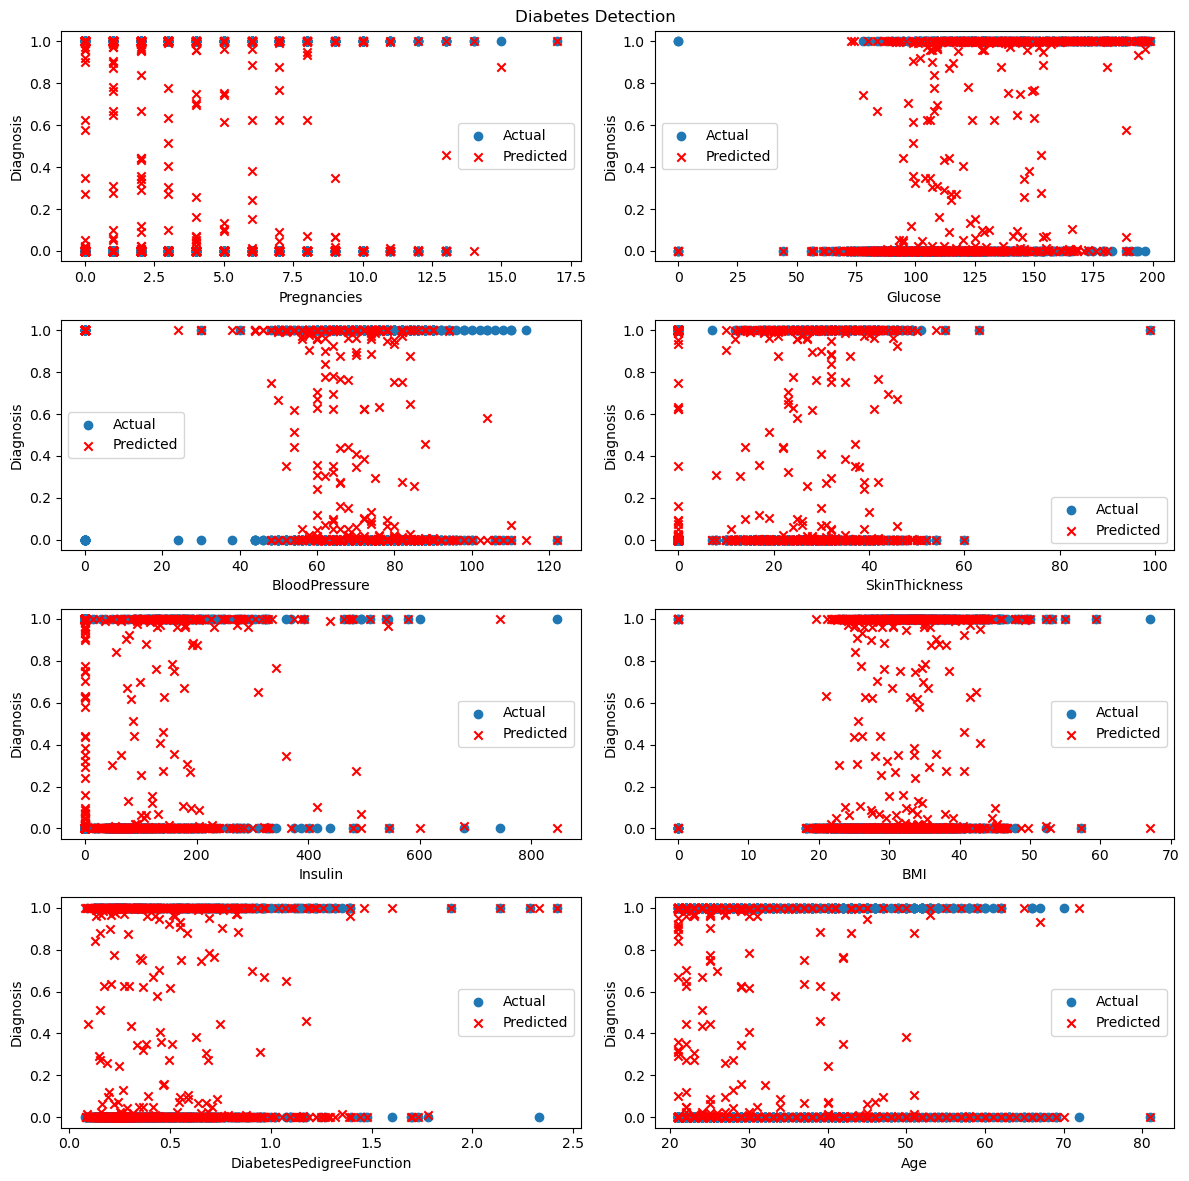

In [11]:
predicted_y = np.dot(X, w) + b
prediction = sigmoid(predicted_y)

# Create a figure with 2 subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle('Diabetes Detection')

# Plot each input feature against the target variable (Diagnosis)
axs[0][0].scatter(X[:, 0], y, label='Actual')  
axs[0][0].scatter(X[:, 0], prediction, color='red', marker='x', label='Predicted')
axs[0][0].set_xlabel('Pregnancies')
axs[0][0].set_ylabel('Diagnosis')
axs[0][0].legend()

axs[0][1].scatter(X[:, 1], y,label="Actual")  
axs[0][1].scatter(X[:, 1], prediction, color='red', marker='x', label='Predicted')
axs[0][1].set_xlabel('Glucose')
axs[0][1].set_ylabel('Diagnosis')
axs[0][1].legend()

axs[1][0].scatter(X[:, 2], y,label="Actual")  
axs[1][0].scatter(X[:, 2], prediction, color='red', marker='x', label='Predicted')
axs[1][0].set_xlabel('BloodPressure')
axs[1][0].set_ylabel('Diagnosis')
axs[1][0].legend()

axs[1][1].scatter(X[:, 3], y,label="Actual") 
axs[1][1].scatter(X[:, 3], prediction, color='red', marker='x', label='Predicted')
axs[1][1].set_xlabel('SkinThickness')
axs[1][1].set_ylabel('Diagnosis')
axs[1][1].legend()

axs[2][0].scatter(X[:, 4], y,label="Actual")  
axs[2][0].scatter(X[:, 4], prediction, color='red', marker='x', label='Predicted')
axs[2][0].set_xlabel('Insulin')
axs[2][0].set_ylabel('Diagnosis')
axs[2][0].legend()

axs[2][1].scatter(X[:, 5], y,label="Actual")  
axs[2][1].scatter(X[:, 5], prediction, color='red', marker='x', label='Predicted')
axs[2][1].set_xlabel('BMI')
axs[2][1].set_ylabel('Diagnosis')
axs[2][1].legend()

axs[3][0].scatter(X[:, 6], y,label="Actual") 
axs[3][0].scatter(X[:, 6], prediction, color='red', marker='x', label='Predicted')
axs[3][0].set_xlabel('DiabetesPedigreeFunction')
axs[3][0].set_ylabel('Diagnosis')
axs[3][0].legend()

axs[3][1].scatter(X[:, 7], y,label="Actual") 
axs[3][1].scatter(X[:, 7], prediction, color='red', marker='x', label='Predicted')
axs[3][1].set_xlabel('Age')
axs[3][1].set_ylabel('Diagnosis')
axs[3][1].legend()


# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


Model is trained Use it to make predictions :)

In [12]:
# Example of a sample input for testing
sample_input = [3, 120, 70, 30, 100, 25, 0.45, 40]

# Reshape the sample input to match the shape of X (assuming X has shape (m, 8))
sample_input = np.array(sample_input).reshape(1, -1)


# Make a prediction using the trained model
z = np.dot(sample_input, w) + b
prediction = sigmoid(z)

# Convert the prediction to a class label (0 or 1) based on a threshold (e.g., 0.5)
predicted_class = 1 if prediction >= 0.5 else 0

print("Sample Input:", sample_input)
print("Predicted Probability of Diabetes:", prediction)
threshold = 0.5

# Check if the predicted probability is greater than the threshold
if prediction >= threshold:
    print("The person is predicted to have diabetes.")
else:
    print("The person is predicted to not have diabetes.")


Sample Input: [[  3.   120.    70.    30.   100.    25.     0.45  40.  ]]
Predicted Probability of Diabetes: [1.72729836e-09]
The person is predicted to not have diabetes.
